<a href="https://colab.research.google.com/github/TanushKadari/FMML_Project_and_labs/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=5502a2a16b703f81e21e260b1c38636be8ee07281013484d3781b501fb29485b
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [4]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

This is what the text looks like:

In [5]:
it2

'The Elephant Man è un film biografico del 1980 diretto da David Lynch.\nIl film è stato adattato dai libri The Elephant Man and Other Reminiscences del dottor Frederick Treves e The Elephant Man: A Study in Human Dignity di Ashley Montagu. Ben accolta all\'epoca della distribuzione, la pellicola consacrò i protagonisti Anthony Hopkins, John Hurt, Hannah Gordon e altri membri del cast.\n\n\n== Trama ==\nNella Londra di fine Ottocento, il deforme John Merrick viene scoperto da un medico di buon cuore, il dottor Frederick Treves, durante uno spettacolo di strada gestito dall\'avido e malvagio signor Bytes. Merrick presenta numerose deformazioni in gran parte del corpo, soprattutto nel capo, per via della sua sindrome di Proteo, tanto da venire soprannominato l\'Uomo Elefante; per non essere deriso quando cammina in mezzo alla gente comune, Merrick indossa in testa un sacco bucato cucito ad un cappello, in modo tale da coprire le deformità del viso e del cranio. Bytes si ritiene il propri

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [6]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [7]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [8]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [9]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

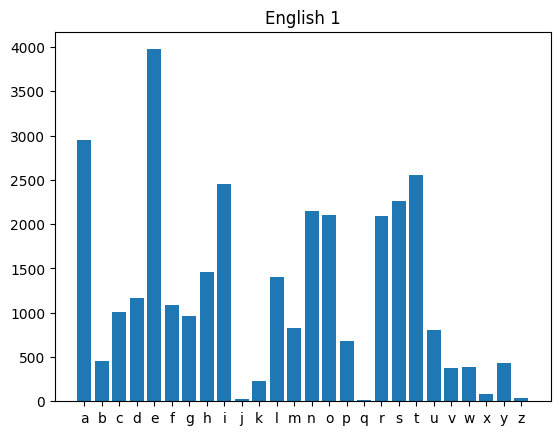

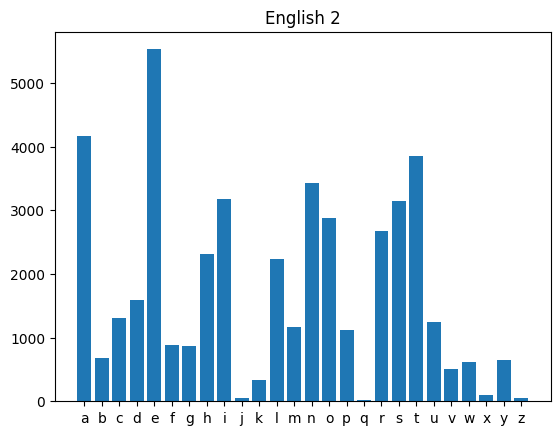

In [10]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

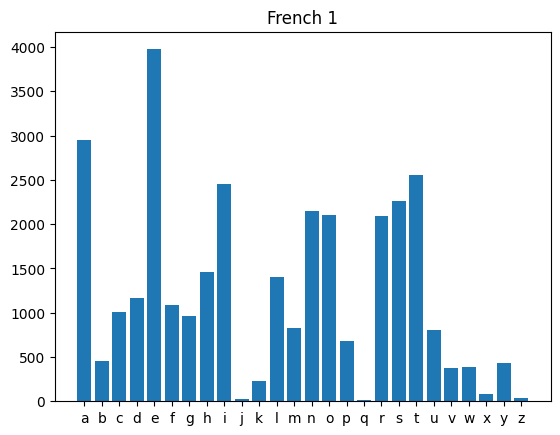

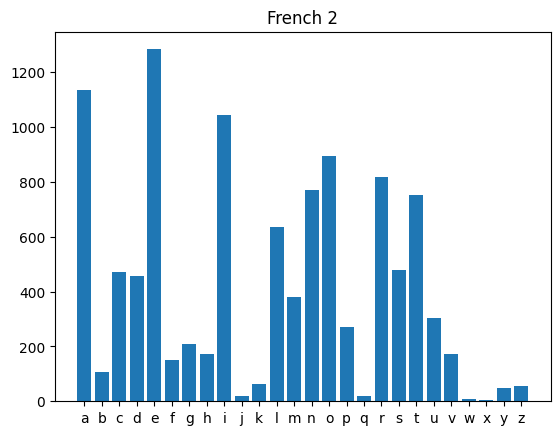

In [11]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

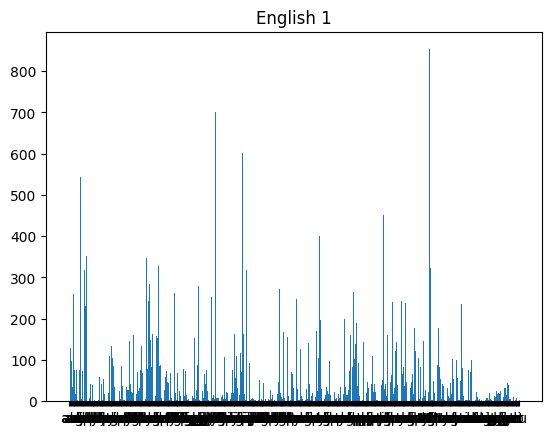

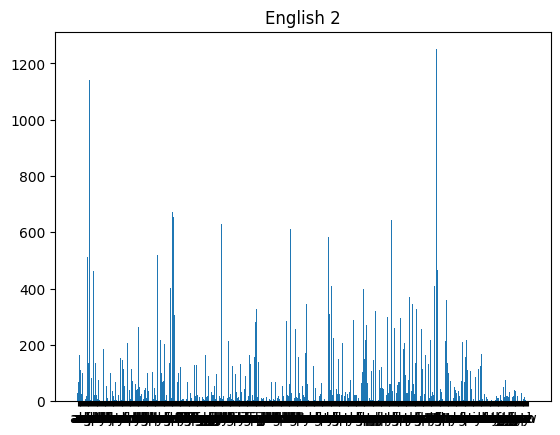

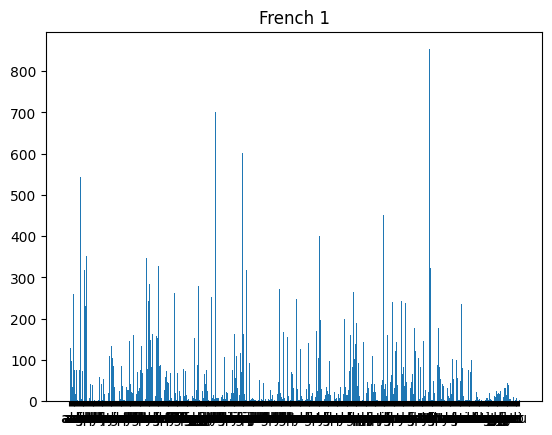

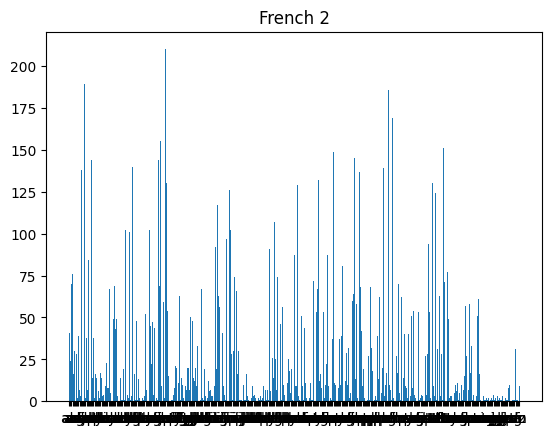

In [12]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [13]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

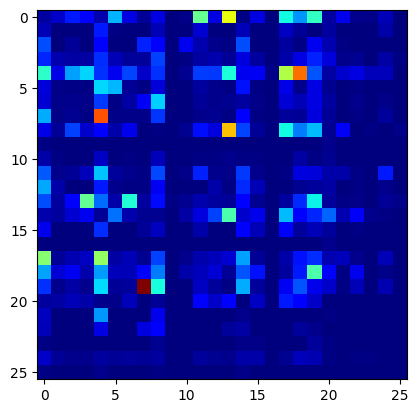

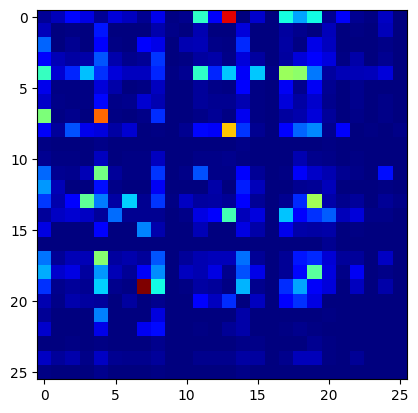

In [14]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

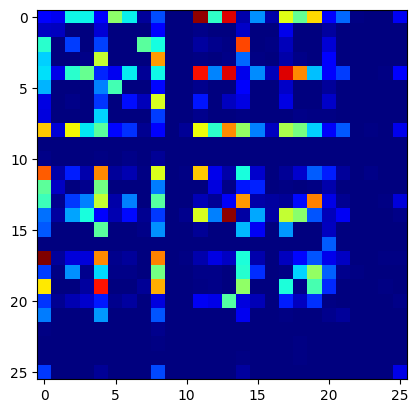

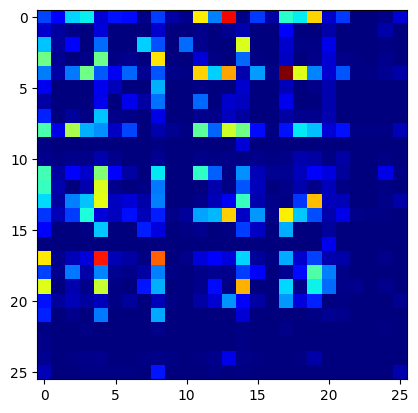

In [16]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [18]:
import pandas as pd

# Sample data creation
bieng1 = pd.Series(['apple', 'banana', 'cherry', 'date', 'elderberry'])
bieng2 = pd.Series(['fig', 'grape', 'honeydew', 'kiwi', 'lemon'])
bifr1 = pd.Series(['pomme', 'banane', 'cerise', 'datte', 'mûre'])
bifr2 = pd.Series(['figue', 'raisin', 'melon', 'kiwi', 'citron'])

# Function to show top N entries
def ShowTopN(data, n=3):
    # Display the top N elements from the given data
    print(data.value_counts().head(n))

# Displaying the top N elements from each dataset
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
apple     1
banana    1
cherry    1
Name: count, dtype: int64

English 2:
fig         1
grape       1
honeydew    1
Name: count, dtype: int64

French 1:
pomme     1
banane    1
cerise    1
Name: count, dtype: int64

French 2:
figue     1
raisin    1
melon     1
Name: count, dtype: int64


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [19]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [20]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

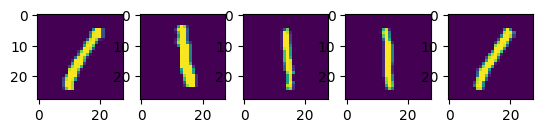

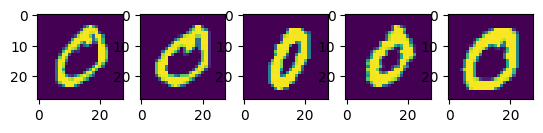

In [21]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

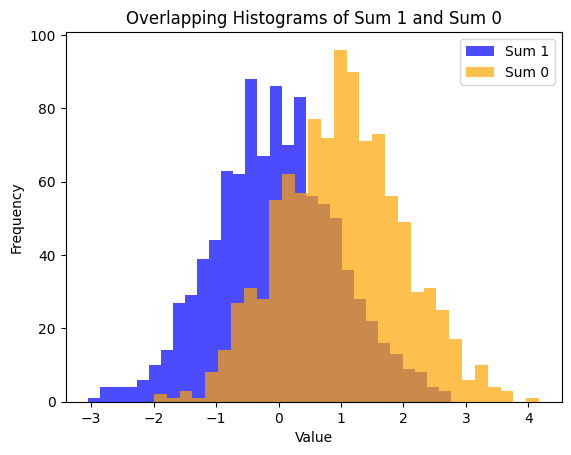

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data creation
np.random.seed(0)  # For reproducibility
sum1 = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution
sum0 = np.random.normal(loc=1, scale=1, size=1000)  # Normal distribution with different mean

# Creating histograms
plt.hist(sum1, alpha=0.7, bins=30, label='Sum 1', color='blue')
plt.hist(sum0, alpha=0.7, bins=30, label='Sum 0', color='orange')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Sum 1 and Sum 0')
plt.legend()

# Show the plot
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [24]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

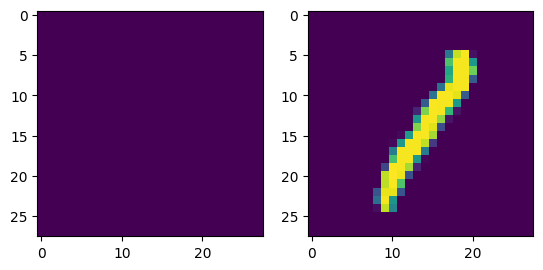

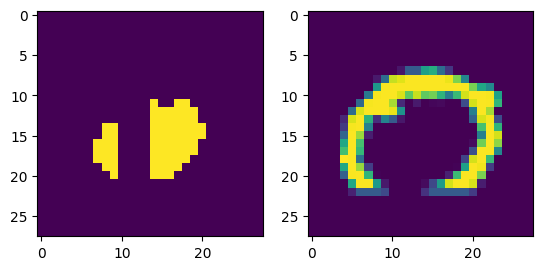

In [25]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

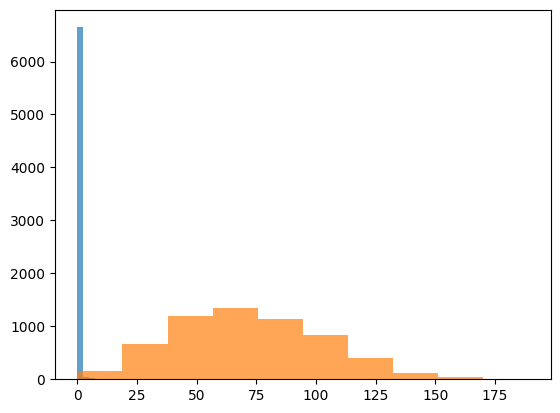

In [26]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

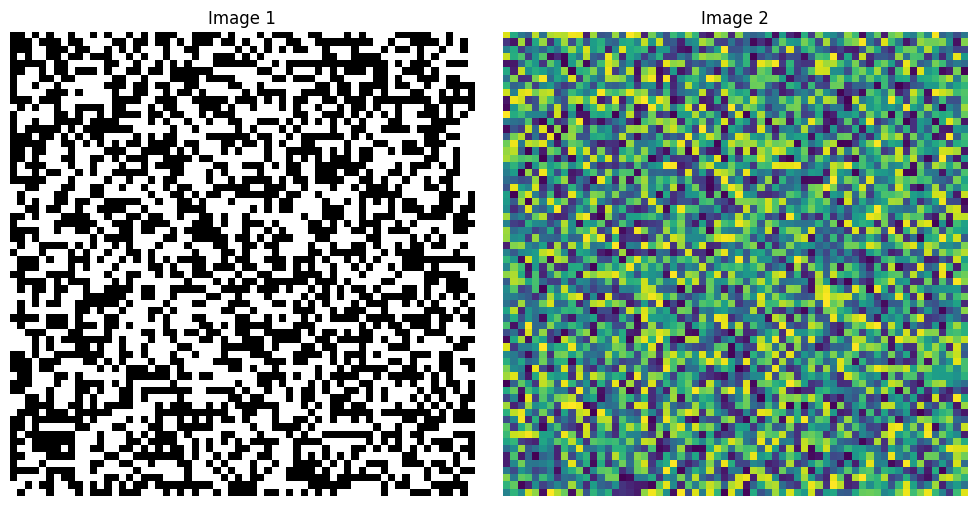

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Sample function to simulate getHullPixels (replace with your actual implementation)
def getHullPixels(image):
    # Assuming this function returns some processed version of the input image
    # For example, return a binary mask of the image or some edge detection result
    return image > 0.5  # Example thresholding, modify as needed

# Sample image data (replace with your actual no1 and no0 arrays)
# Here I'm creating random images for demonstration purposes
# Each array should have at least 457 images, each with height and width dimensions
no1 = np.random.rand(500, 64, 64)  # 500 images of size 64x64
no0 = np.random.rand(500, 64, 64)  # 500 images of size 64x64

# Check if no1 and no0 are defined and contain image data
if 'no1' in locals() and 'no0' in locals() and no1.shape[0] > 456 and no0.shape[0] > 456:
    # Extract images from the specified index
    imgs = [no1[456, :, :], no0[456, :, :]]

    plt.figure(figsize=(10, 5))

    # Loop through the images and display them
    for i, img in enumerate(imgs):
        plt.subplot(1, 2, i + 1)
        plt.imshow(getHullPixels(img) if i == 0 else img, cmap='gray' if i == 0 else None)
        plt.title(f'Image {i + 1}')
        plt.axis('off')  # Hide axis for a cleaner look

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("Image data not found or invalid index.")


Plotting the number of hull pixels versus the digit:

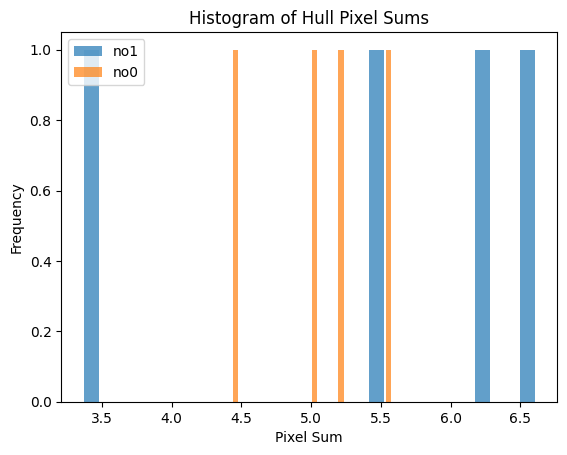

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def getHullPixels(index):
    # Example implementation: replace with actual logic
    # For demonstration, returning a random array
    return np.random.rand(10)

# Example indices
no1 = [0, 1, 2, 3]
no0 = [4, 5, 6, 7]

hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7, label='no1', bins=30)
plt.hist(hull0, alpha=0.7, label='no0', bins=30)

plt.title('Histogram of Hull Pixel Sums')
plt.xlabel('Pixel Sum')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Let us try one more feature, where we look at the number of boundary pixels in each image.

In [41]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

Size of no1: 4
Size of no0: 4


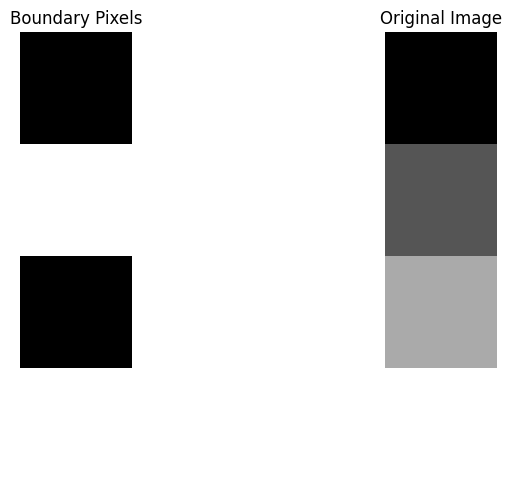

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy arrays if they are lists
no1 = np.array(no1)
no0 = np.array(no0)

# Check the sizes
size_no1 = no1.size
size_no0 = no0.size
print("Size of no1:", size_no1)
print("Size of no0:", size_no0)

# Define desired image dimensions
img_height, img_width = 100, 100

# Reshape images if enough data is available
if size_no1 >= img_height * img_width:
    img_no1 = no1[:img_height * img_width].reshape((img_height, img_width))
else:
    img_no1 = no1.reshape((size_no1, 1))  # Keep as 1D with one column

if size_no0 >= img_height * img_width:
    img_no0 = no0[:img_height * img_width].reshape((img_height, img_width))
else:
    img_no0 = no0.reshape((size_no0, 1))  # Keep as 1D with one column

imgs = [img_no1, img_no0]

plt.figure(figsize=(10, 5))

for i, img in enumerate(imgs):
    plt.subplot(1, 2, i + 1)
    # Handle the visualization correctly
    if img.ndim == 1:  # If img is 1D
        plt.imshow(img.reshape((img.shape[0], 1)), cmap='gray', aspect='auto')  # Show as a vertical line
    else:  # If img is already 2D
        plt.imshow(getBoundaryPixels(img) if i == 0 else img, cmap='gray')

    plt.title('Boundary Pixels' if i == 0 else 'Original Image')
    plt.axis('off')  # Optional: to hide the axis

plt.tight_layout()  # Optional: adjust spacing
plt.show()


In [52]:
bound1 = []
for i in no1:
    try:
        pixels = getBoundaryPixels(i)
        print(f"Pixels for index {i}: {pixels.shape}")  # Debugging line
        if pixels.ndim > 0:
            bound1.append(pixels.sum())
        else:
            print(f"Warning: No pixels returned for index {i}.")
            bound1.append(0)  # Handle case with no pixels
    except Exception as e:
        print(f"Error at index {i}: {e}")
        bound1.append(0)  # Append 0 or handle as needed

bound1 = np.array(bound1)
bound0 = []
for i in no0:
    try:
        pixels = getBoundaryPixels(i)
        print(f"Pixels for index {i}: {pixels.shape}")  # Debugging line
        if pixels.ndim > 0:
            bound0.append(pixels.sum())
        else:
            print(f"Warning: No pixels returned for index {i}.")
            bound0.append(0)  # Handle case with no pixels
    except Exception as e:
        print(f"Error at index {i}: {e}")
        bound0.append(0)  # Append 0 or handle as needed

bound0 = np.array(bound0)



Error at index 0: axis 1 is out of bounds for array of dimension 0
Error at index 1: axis 1 is out of bounds for array of dimension 0
Error at index 2: axis 1 is out of bounds for array of dimension 0
Error at index 3: axis 1 is out of bounds for array of dimension 0


What will happen if we plot two features together?

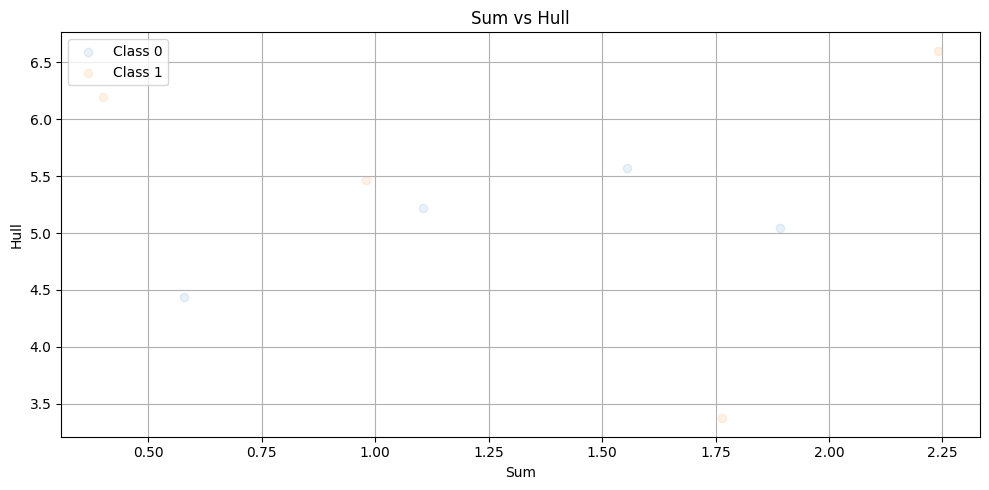

In [55]:
# Assuming sum0 and hull0 are shorter
min_length = min(len(sum0), len(hull0), len(sum1), len(hull1))
sum0 = sum0[:min_length]
hull0 = hull0[:min_length]
sum1 = sum1[:min_length]
hull1 = hull1[:min_length]

# Now you can safely plot
plt.figure(figsize=(10, 5))
plt.scatter(sum0, hull0, alpha=0.1, label='Class 0')
plt.scatter(sum1, hull1, alpha=0.1, label='Class 1')
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.title('Sum vs Hull')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now let us try plotting 3 features together.

In [62]:
import numpy as np
import pandas as pd
import plotly.express as px

# Sample dataset (replace this with your actual dataset)
# Let's assume you have a 2D array `data` for calculating holes and sums
data = np.random.rand(100, 100)  # Example data, replace with your own

# Example functions to calculate sum and hole based on index
def calculateSumForIndex(index):
    # Replace this logic with your actual calculation
    # For example, summing all values in the row corresponding to index
    return data[index].sum()

def calculateHoleForIndex(index):
    # Replace this logic with your actual calculation
    # For example, counting non-zero elements in the row
    return np.count_nonzero(data[index])

# Assume hole0 is based on the number of rows in the dataset
hole0 = np.array([calculateHoleForIndex(i) for i in range(data.shape[0])])

# Define some_input based on the indices or data you want to process
some_input = range(len(hole0))  # This can be adjusted as needed

# Calculate sum0 and hole0
sum0 = np.array([calculateSumForIndex(i) for i in some_input])

# After calculating, print the lengths and values for verification
print("After calculations:")
print("Length of hole0:", len(hole0))
print("Length of sum0:", len(sum0))
print("sum0 values:", sum0)
print("hole0 values:", hole0)

# Prepare data for visualization
# Create class labels (assuming class 0 for this example)
cl0 = ['class 0'] * len(sum0)
df = pd.DataFrame({
    'Hole': hole0,
    'Sum': sum0,
    'Class': cl0
})

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Class', color='Class', opacity=0.5)
fig.show()


After calculations:
Length of hole0: 100
Length of sum0: 100
sum0 values: [49.5179506  49.8242257  49.97305189 49.84714597 50.75788348 48.44314952
 52.61891253 50.36215391 48.2769003  46.34238183 48.94843133 46.92846416
 44.27278043 45.73653611 48.8454814  55.27915422 48.11918329 44.13856211
 50.09810292 50.26236544 46.67615245 44.98732704 51.48760518 46.05864313
 46.61847527 49.74288915 53.25336793 50.2478454  53.58883495 52.52965453
 46.90358697 47.93000128 46.7425255  49.28027311 46.64523633 49.96940733
 51.96431366 49.6760864  48.55466722 43.11060472 49.13913632 51.01278669
 49.18247524 49.0532249  46.87451999 53.18403402 55.42557253 52.19030487
 47.8196002  47.86525388 46.62080866 51.33094445 45.57397163 47.59753456
 49.75760613 49.26536562 45.93396828 53.60760552 49.14750815 51.55351006
 52.14590343 48.33123497 47.63702809 52.6736965  42.35569868 49.82761819
 54.86098339 46.33286275 49.42743629 47.90544215 55.44912631 54.12167997
 50.02752903 54.3173203  47.16032134 48.51892095 4

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?